# Sales Prediction

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Data Loading

In [2]:
df = pd.read_csv(r"C:\Users\CSC 2020\Downloads\Advertising.csv", index_col=0)

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Data Cleaning and Exploration

In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.duplicated().sum() # no duplicates

np.int64(0)

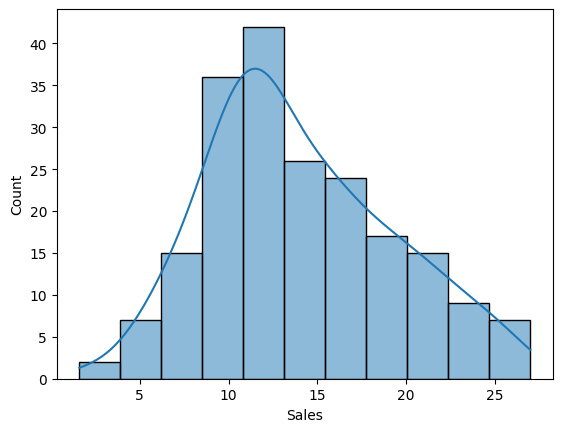

In [8]:
sns.histplot(data = df, x = 'Sales', kde = True)

plt.show() # Most sales values are clustered toward the lower end.

In [9]:
# Calculating skewness
skewness = df['Sales'].skew()

print(f"Skewness of Sales: {skewness}")

Skewness of Sales: 0.4075714250767127


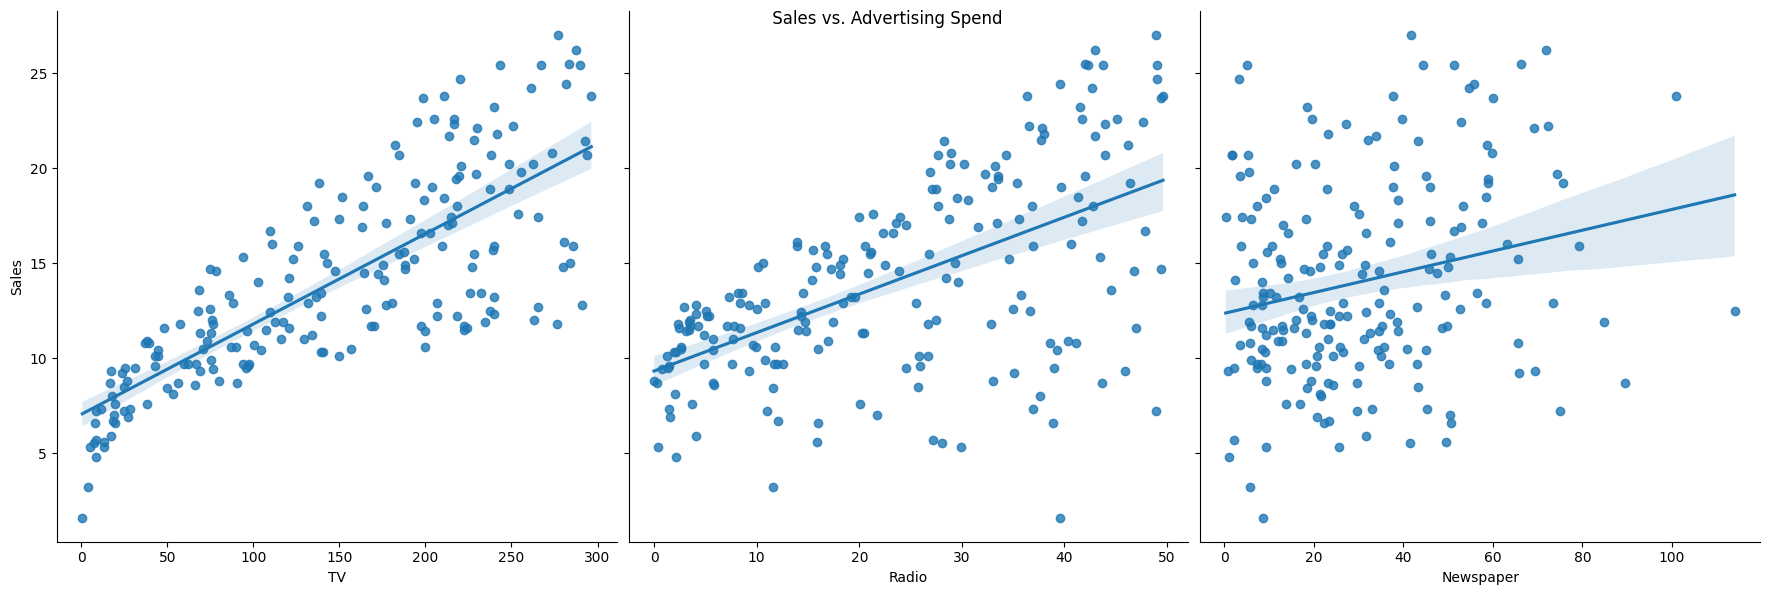

In [10]:
#  Visualizing relationships between features and target
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg', height = 6)
plt.suptitle(" Sales vs. Advertising Spend")
plt.show()

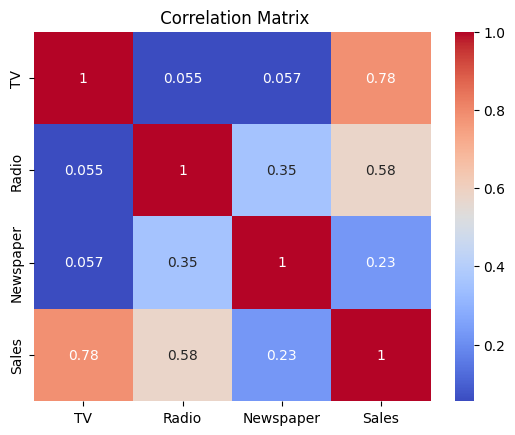

In [11]:
# Heatmap to show correlations

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title(" Correlation Matrix")
plt.show()

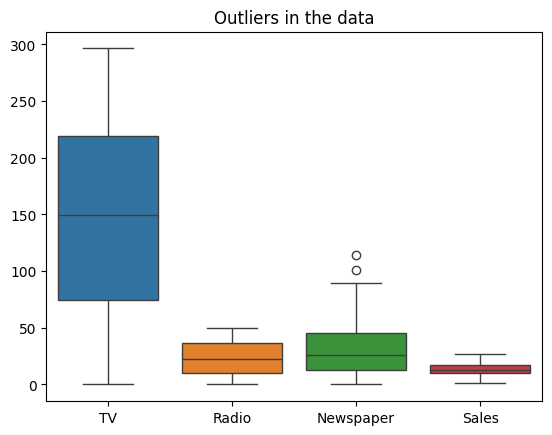

In [12]:
# Checking Outliers

sns.boxplot(data = df)
plt.title("Outliers in the data")

plt.show() # No Outliers Detected

## Model Training and Evaluation

In [13]:
# Imputing Features and Target

X = df.drop('Sales', axis = 1)
y = df['Sales']

In [14]:
# Splitting the data with a fixed random_state for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Training and evaluating each model
predictions = {}
print("\n Model Performance Comparison:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name:20} ➤ RMSE: {rmse:.2f} | R²: {r2:.2f} | MAE: {mae:.2f}")


 Model Performance Comparison:

Linear Regression    ➤ RMSE: 1.78 | R²: 0.90 | MAE: 1.46
Random Forest        ➤ RMSE: 0.77 | R²: 0.98 | MAE: 0.62
XGBoost              ➤ RMSE: 0.82 | R²: 0.98 | MAE: 0.70


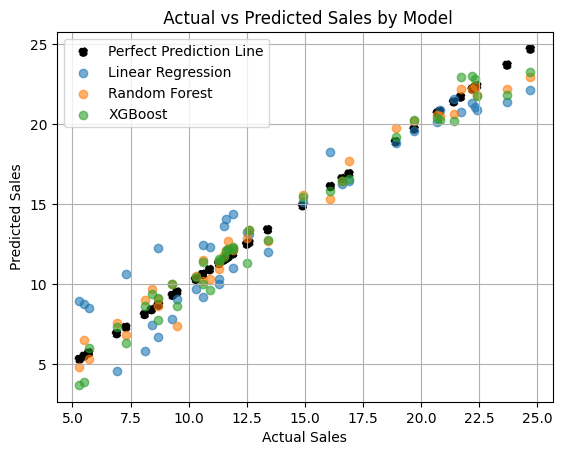

In [15]:
# Plotting Actual vs Predicted Sales
plt.scatter(y_test, y_test, color='black', linestyle='--', label='Perfect Prediction Line')

for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, alpha=0.6, label=name)
    

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(" Actual vs Predicted Sales by Model")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

In this project, I evaluated three models to predict sales based on advertising spend. Linear Regression provided a strong baseline (R² = 0.90, RMSE = 1.78), but both Random Forest and XGBoost significantly outperformed it, achieving higher accuracy (R² = 0.98) and lower error rates. These results highlight the advantage of using ensemble methods for capturing complex patterns in marketing data.